In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import string
import logging
import math
import pydotplus
np.set_printoptions(suppress=True)

In [5]:
tweets = pd.read_csv('tweets_sport-1.csv', parse_dates=['time'])
tv = pd.read_csv('tv_rating_new-4.csv')

# Data Understanding

## tweets data

In [3]:
tweets 
## contains tweet text data with time,date and interactions among tweet users
## overall 13523 tweets in this dataset 

,id,text,event_number,player_dummy,team_dummy,weekday,month,day,time,user_screen_name,retweets,likes,comments
0,5.210000e+17,"""rt @dariofranchitti: this bathurst race has b...",11,0,0,7,10,12,2022-05-26 07:28:00,007_dot,0.0,0.0,0.0
1,5.210000e+17,"""rt @wtf1couk: gp3 fans while you're waiting f...",11,0,0,7,10,12,2022-05-26 07:28:00,007_dot,0.0,0.0,0.0
2,5.210000e+17,"""rt @sally_fitz: incredible final laps of #bat...",11,1,0,7,10,12,2022-05-26 07:31:00,007cnt,0.0,0.0,0.0
3,5.210000e+17,"""rt @v8supercars: top 10 - mostert, moffat, pe...",11,0,0,7,10,12,2022-05-26 09:04:00,007pixxx,0.0,0.0,0.0
4,5.210000e+17,"""#bathurst1000 i present to you, the fully st...",11,0,0,7,10,12,2022-05-26 10:20:00,007pixxx,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13518,5.210000e+17,"""oh, that is absolutely heartbreaking for shan...",11,0,0,7,10,12,2022-05-26 07:06:00,ztevans,2.0,0.0,0.0
13519,4.390000e+17,"""rt @off1cial_sport: clipsal 500 #adelaide htt...",1,0,0,6,3,1,2022-05-26 14:34:00,zuhairazrai,0.0,0.0,0.0
13520,5.260000e+17,"""storm &amp; sunset #adelaide http://t.co/8gym...",12,0,0,7,10,26,2022-05-26 12:50:00,zurijewellery,0.0,0.0,0.0
13521,5.210000e+17,"""""you're a pack of arseholes"" still the greate...",11,0,0,7,10,12,2022-05-26 07:47:00,zvyozdochka,0.0,1.0,1.0


In [19]:
## adding dummy variables for interaction among users
tweets['likes_dummy'] = tweets['likes'].apply(lambda x: 1 if x>0 else 0)
tweets['retweets_dummy'] = tweets['retweets'].apply(lambda x: 1 if x>0 else 0)
tweets['comments_dummy'] = tweets['comments'].apply(lambda x: 1 if x>0 else 0)
tweets['engagement_dummy'] = (tweets['likes_dummy']+tweets['retweets_dummy']+tweets['comments_dummy']).apply(lambda x: 1 if x>0 else 0)

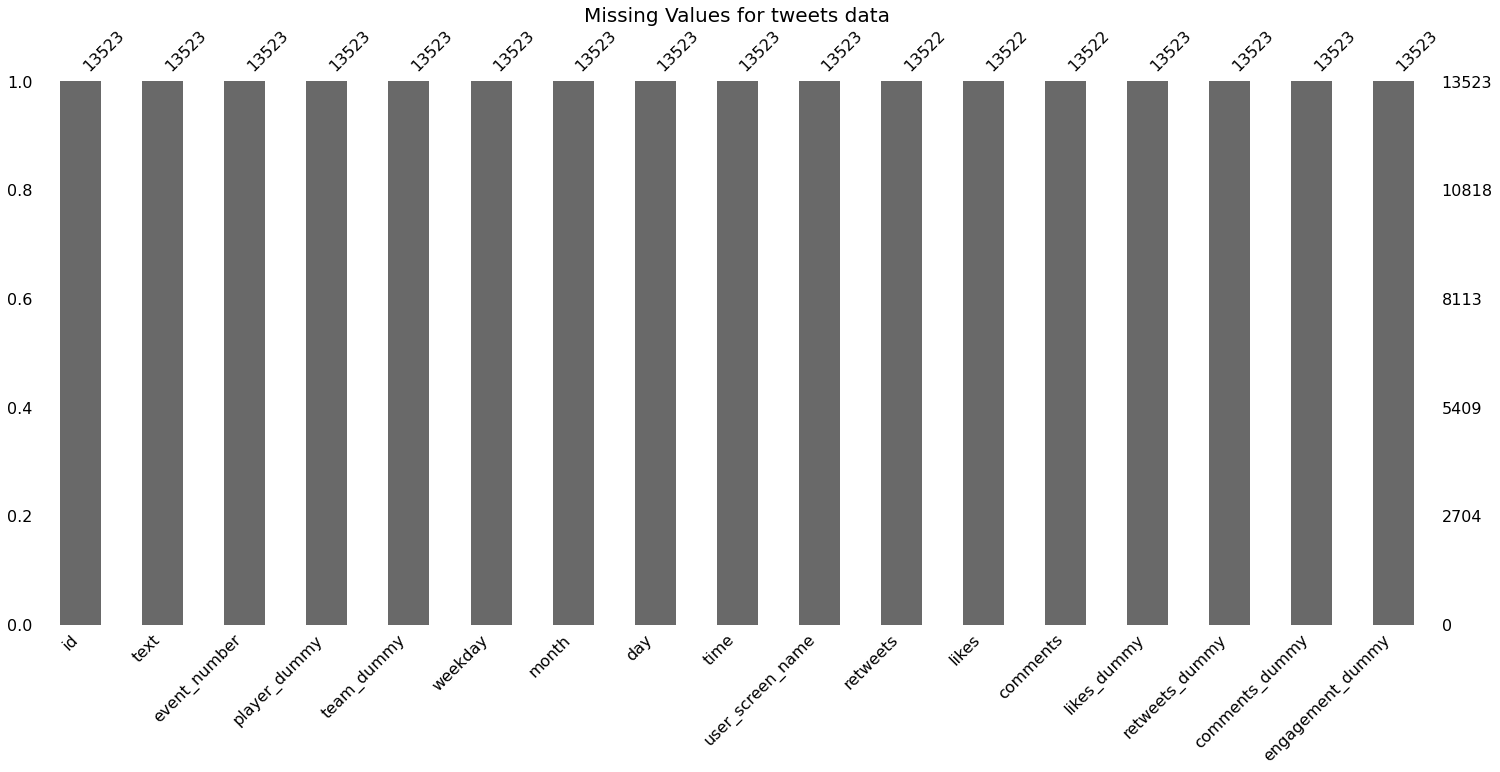

In [20]:
## missing values 
import matplotlib.pyplot as plt
import missingno as msno
msno.bar(tweets)
plt.title('Missing Values for tweets data',fontsize = 20)

plt.show()

In [6]:
print(tweets['user_screen_name'].nunique(dropna = False))## 6073 users with 13523 tweets posted
print(tweets['event_number'].nunique(dropna = False)) ## 14 event every year

6073
14


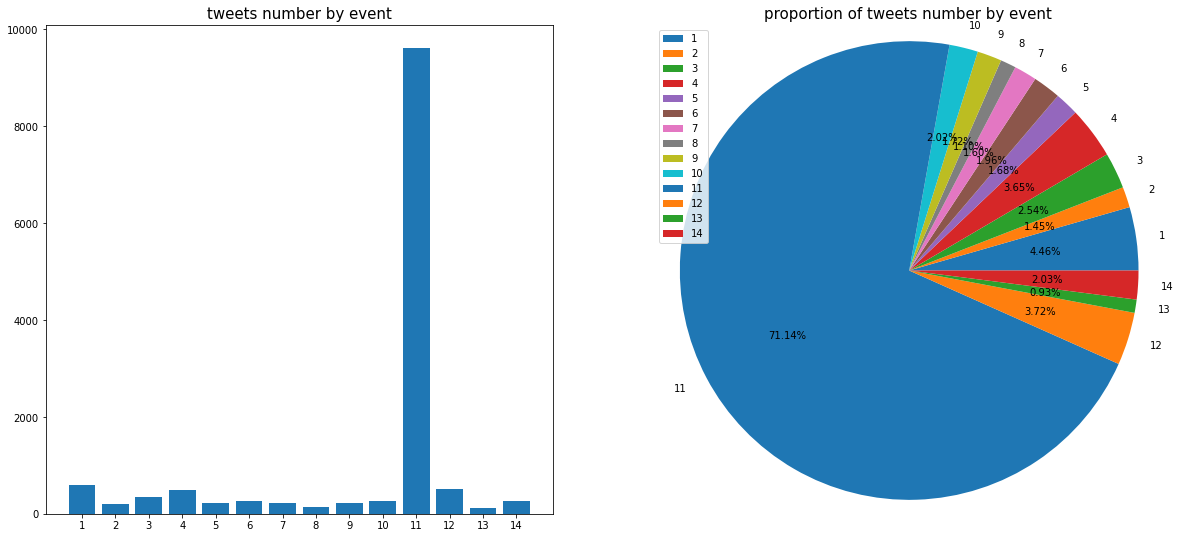

In [7]:
## tweets number by event 
tmp = tweets.groupby('event_number').count()
bar =  tmp.index
height =  tmp['user_screen_name']

plt.figure(figsize = (20,9))

plt.subplot(121)
plt.bar(np.arange(len(bar)),height)
plt.xticks(np.arange(len(bar)),bar)
plt.title('tweets number by event',fontsize =15)

plt.subplot(122)
plt.pie(height,labels = bar,autopct='%1.2f%%')
plt.axis('equal')
plt.title('proportion of tweets number by event',fontsize =15)
plt.legend()

plt.show()


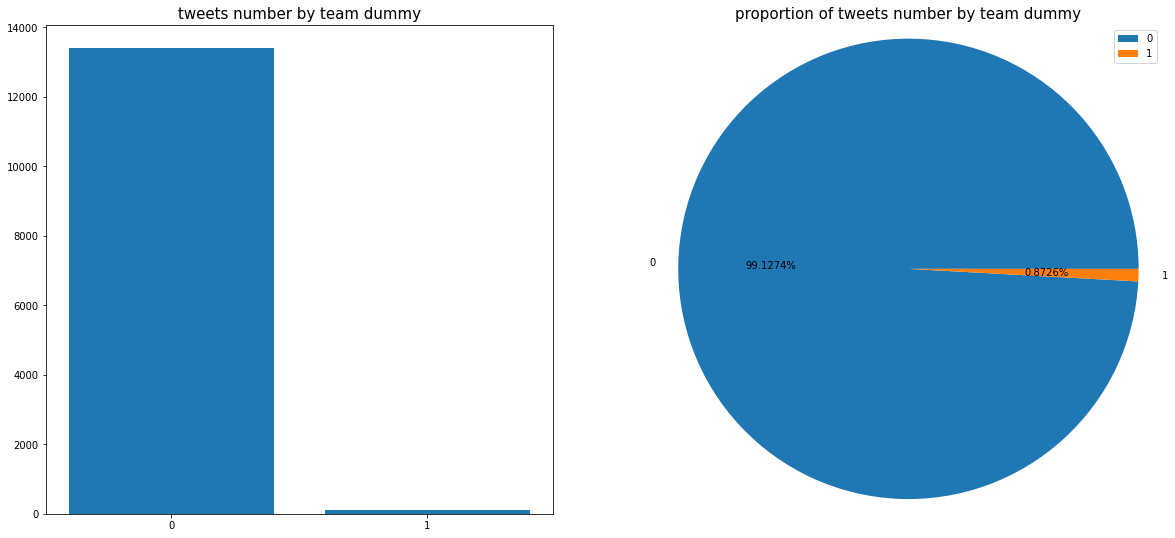

In [8]:
## tweets number by team dummy
tmp = tweets.groupby('team_dummy').count()
bar =  tmp.index
height =  tmp['user_screen_name']

plt.figure(figsize = (20,9))

plt.subplot(121)
plt.bar(np.arange(len(bar)),height)
plt.xticks(np.arange(len(bar)),bar)
plt.title('tweets number by team dummy',fontsize =15)

plt.subplot(122)
plt.pie(height,labels = bar,autopct='%1.4f%%')
plt.axis('equal')
plt.title('proportion of tweets number by team dummy',fontsize =15)
plt.legend()

plt.show()

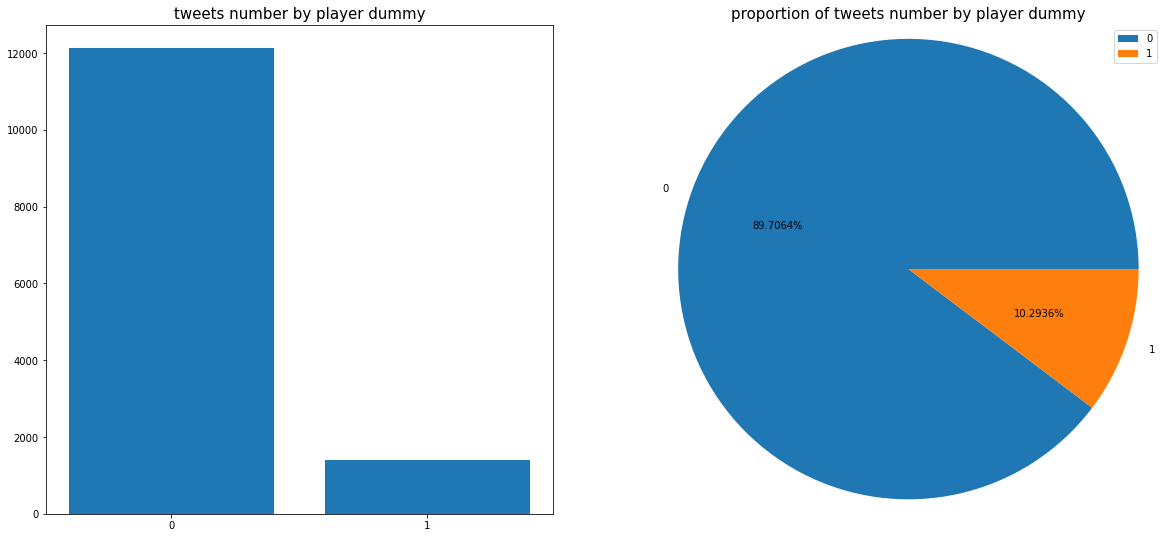

In [9]:
## tweets number by player dummy
tmp = tweets.groupby('player_dummy').count()
bar =  tmp.index
height =  tmp['user_screen_name']

plt.figure(figsize = (20,9))

plt.subplot(121)
plt.bar(np.arange(len(bar)),height)
plt.xticks(np.arange(len(bar)),bar)
plt.title('tweets number by player dummy',fontsize =15)

plt.subplot(122)
plt.pie(height,labels = bar,autopct='%1.4f%%')
plt.axis('equal')
plt.title('proportion of tweets number by player dummy',fontsize =15)
plt.legend()

plt.show()

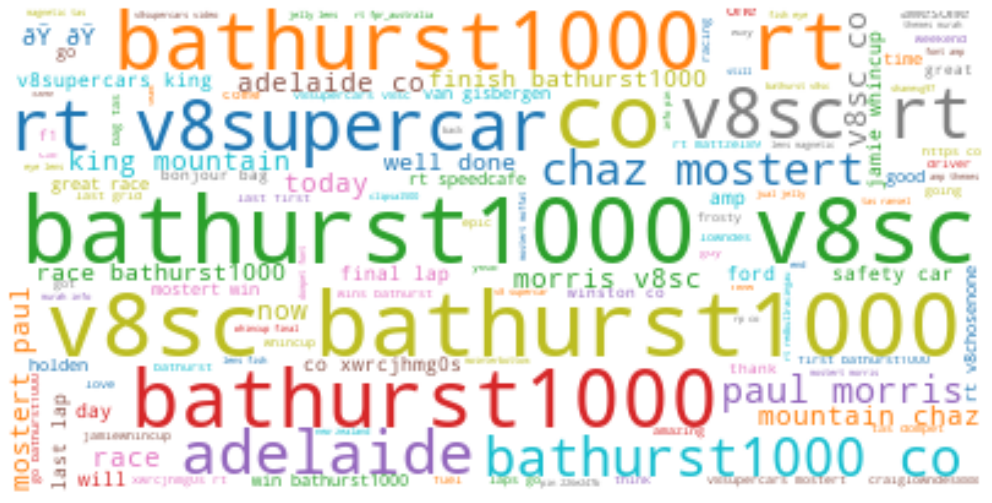

In [10]:
## wordcloud for textual data
from wordcloud import WordCloud


plt.figure(figsize = (20,9))
wordcloud = WordCloud(background_color="white", colormap='tab10', max_words=200).generate(''.join(tweets['text'].tolist()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

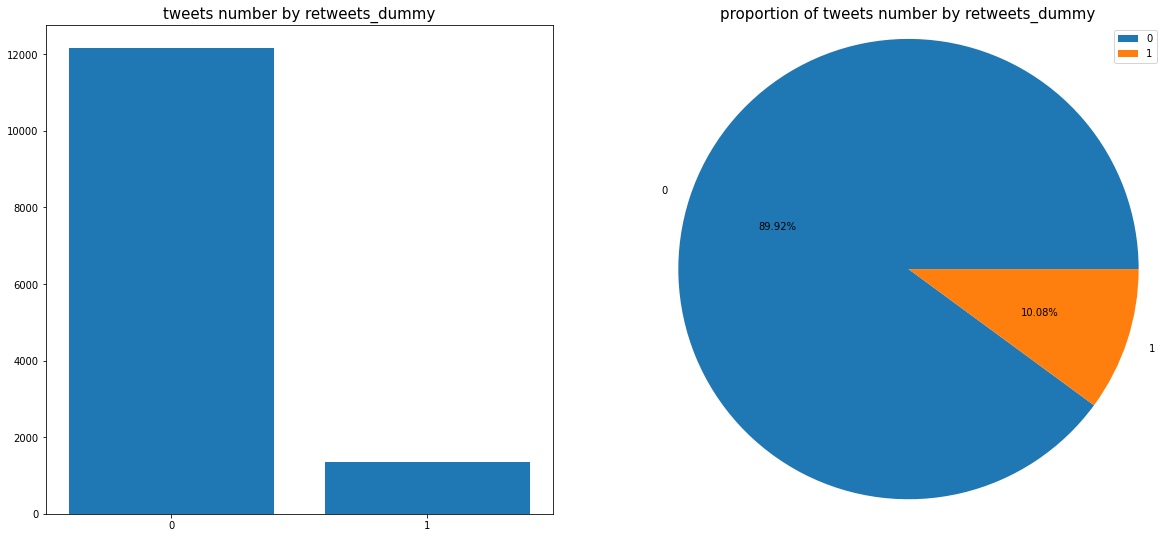

In [11]:
tmp = tweets.groupby('retweets_dummy').count()
bar =  tmp.index
height =  tmp['user_screen_name']

plt.figure(figsize = (20,9))

plt.subplot(121)
plt.bar(np.arange(len(bar)),height)
plt.xticks(np.arange(len(bar)),bar)
plt.title('tweets number by retweets_dummy',fontsize =15)

plt.subplot(122)
plt.pie(height,labels = bar,autopct='%1.2f%%')
plt.axis('equal')
plt.title('proportion of tweets number by retweets_dummy',fontsize =15)
plt.legend()

plt.show()

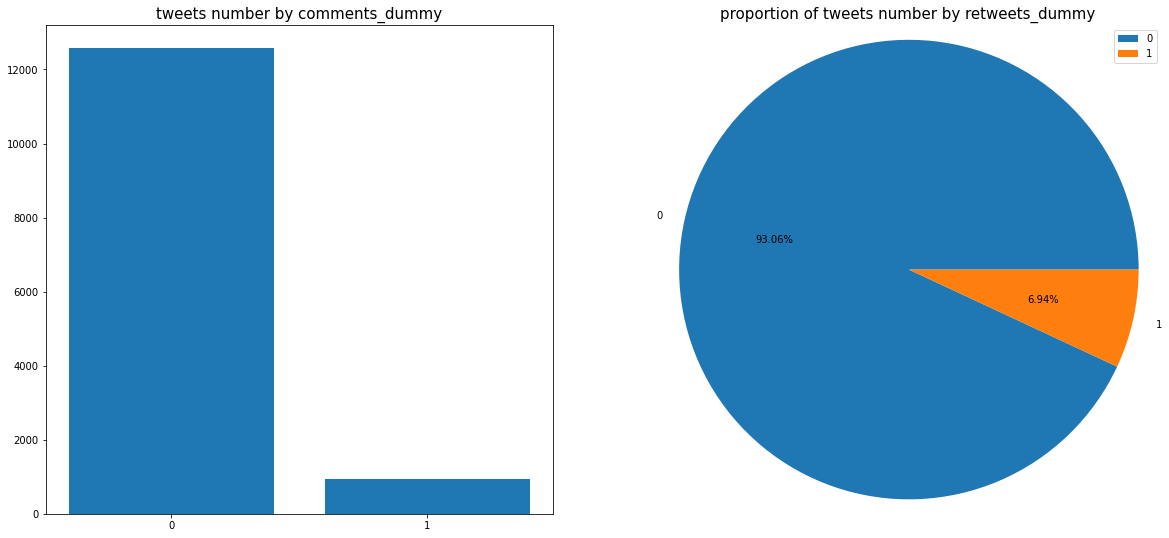

In [12]:
tmp = tweets.groupby('comments_dummy').count()
bar =  tmp.index
height =  tmp['user_screen_name']

plt.figure(figsize = (20,9))

plt.subplot(121)
plt.bar(np.arange(len(bar)),height)
plt.xticks(np.arange(len(bar)),bar)
plt.title('tweets number by comments_dummy',fontsize =15)

plt.subplot(122)
plt.pie(height,labels = bar,autopct='%1.2f%%')
plt.axis('equal')
plt.title('proportion of tweets number by retweets_dummy',fontsize =15)
plt.legend()

plt.show()

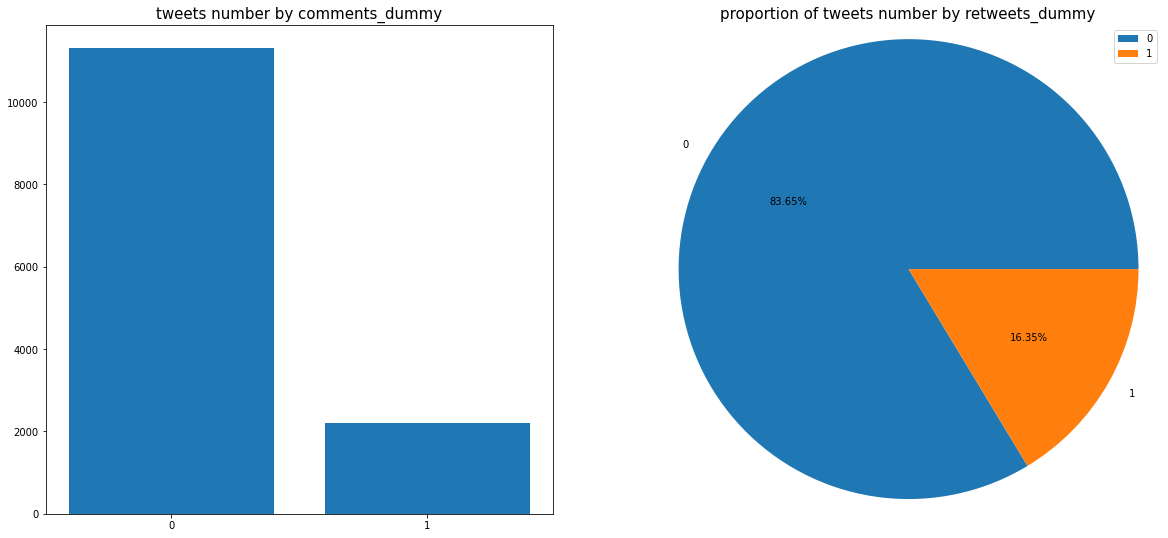

In [13]:
tmp = tweets.groupby('likes_dummy').count()
bar =  tmp.index
height =  tmp['user_screen_name']

plt.figure(figsize = (20,9))

plt.subplot(121)
plt.bar(np.arange(len(bar)),height)
plt.xticks(np.arange(len(bar)),bar)
plt.title('tweets number by comments_dummy',fontsize =15)

plt.subplot(122)
plt.pie(height,labels = bar,autopct='%1.2f%%')
plt.axis('equal')
plt.title('proportion of tweets number by retweets_dummy',fontsize =15)
plt.legend()

plt.show()

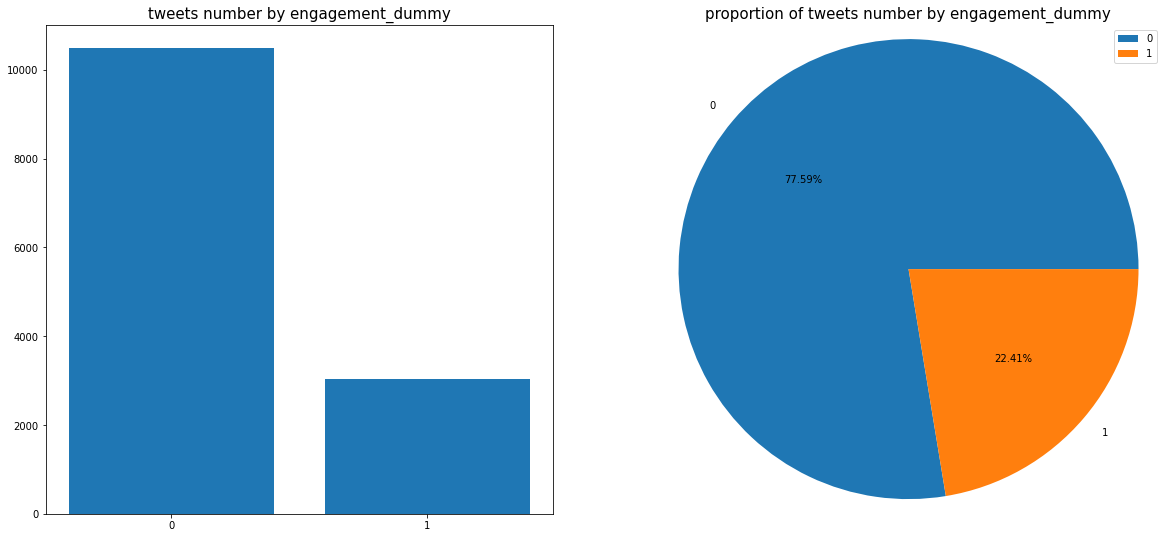

In [14]:
tmp = tweets.groupby('engagement_dummy').count()
bar =  tmp.index
height =  tmp['user_screen_name']

plt.figure(figsize = (20,9))

plt.subplot(121)
plt.bar(np.arange(len(bar)),height)
plt.xticks(np.arange(len(bar)),bar)
plt.title('tweets number by engagement_dummy',fontsize =15)

plt.subplot(122)
plt.pie(height,labels = bar,autopct='%1.2f%%')
plt.axis('equal')
plt.title('proportion of tweets number by engagement_dummy',fontsize =15)
plt.legend()

plt.show()

## TV rating data

In [15]:
tv

,tv_channel,city,tvviewers,start_time,end_time,event_number,weekday
0,ATN7,Sydney,69,14:00,14:14,1,5
1,ATN7,Sydney,56,14:15,14:29,1,5
2,ATN7,Sydney,51,14:30,14:44,1,5
3,ATN7,Sydney,48,14:45,14:59,1,5
4,ATN7,Sydney,48,15:00,15:14,1,5
...,...,...,...,...,...,...,...
3189,TVW7,Perth,53,16:45,16:59,14,7
3190,TVW7,Perth,47,17:00,17:14,14,7
3191,TVW7,Perth,35,17:15,17:29,14,7
3192,TVW7,Perth,30,17:30,17:44,14,7


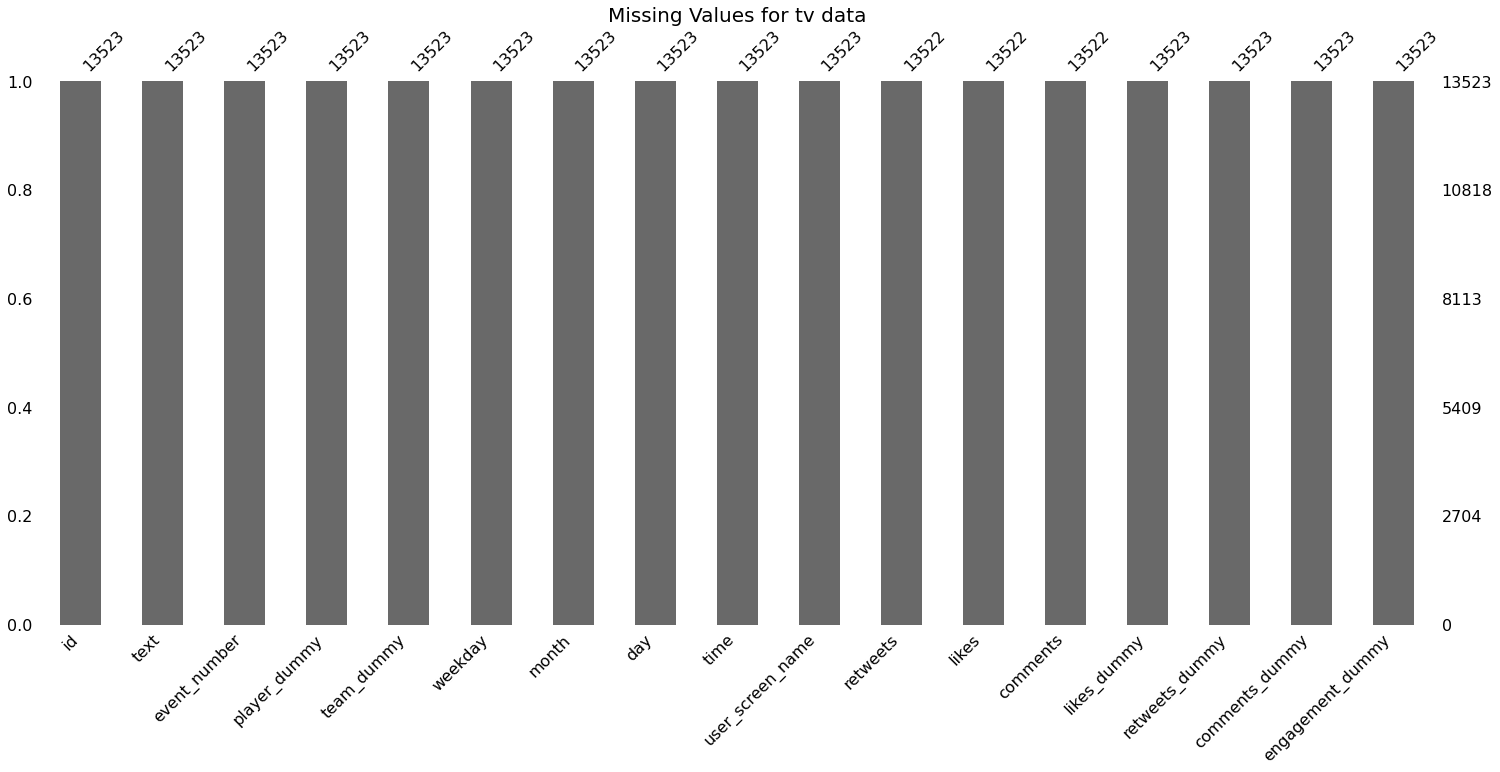

In [16]:
msno.bar(tweets)
plt.title('Missing Values for tv data',fontsize = 20)

plt.show()

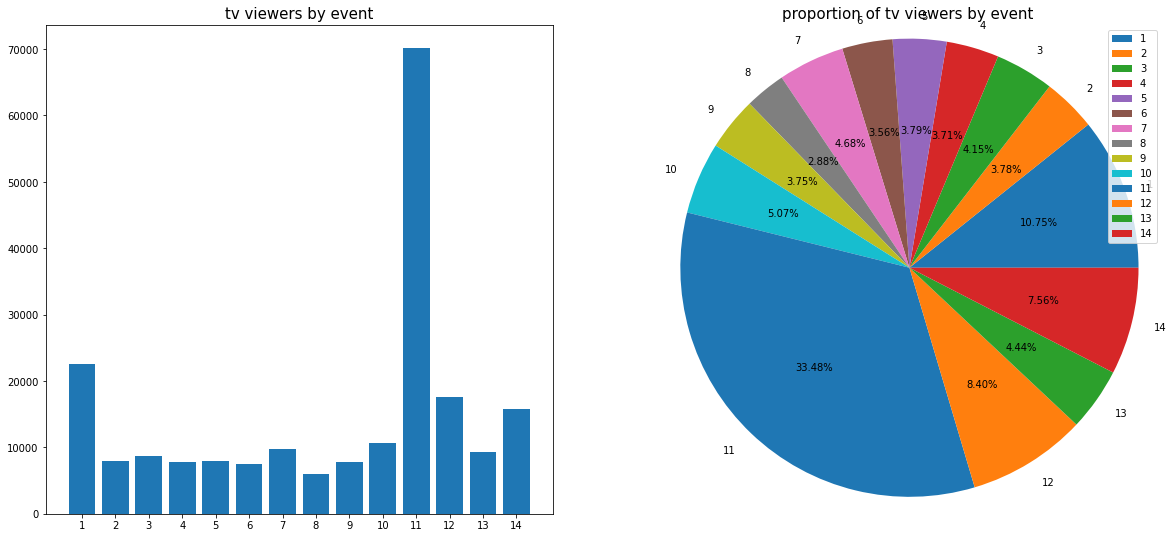

In [17]:
tmp = tv.groupby('event_number').sum()
bar =  tmp.index
height =  tmp['tvviewers']

plt.figure(figsize = (20,9))

plt.subplot(121)
plt.bar(np.arange(len(bar)),height)
plt.xticks(np.arange(len(bar)),bar)
plt.title('tv viewers by event',fontsize =15)

plt.subplot(122)
plt.pie(height,labels = bar,autopct='%1.2f%%')
plt.axis('equal')
plt.title('proportion of tv viewers by event',fontsize =15)
plt.legend()

plt.show()


# Q1 What are the main topics of tweets during the supercar events?



## textual data process
for topic modelling and sentiment analysis

In [6]:
import re
import nltk
from sklearn.feature_extraction import text 


my_additional_stop_words = ["bathurst","bathurst1000","adelaide","http","tas","tcm","darwin","coateshire","sandown","clipsal","sydney", "townsville"]
stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

nltk.download('wordnet')
import nltk.stem as ns
wnl = ns.WordNetLemmatizer()



# WordNetLemmatizer().lemmatize(word) for word in sent.split(" ")
def text_preproc(x):
  x = x.lower() ## convert the reviews into lowercase
  x = ' '.join([word for word in x.split(" ") if word not in stop_words]) ## remove stopwords in english using nltk package
  x = ' '.join([wnl.lemmatize(word) for word in x.split(" ")])
  return x

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [19]:
tweets['text_filtered'] = tweets['text'].apply(lambda x: [text_preproc(x)])

In [21]:
tweets.text_filtered

0        ["rt @dariofranchitti: race absolute belter!! ...
1        ["rt @wtf1couk: gp3 fan you're waiting race re...
2        ["rt @sally_fitz: incredible final lap #bathur...
3        ["rt @v8supercars: 10 - mostert, moffat, perca...
4        ["#bathurst1000  present you, fully street leg...
                               ...                        
13518    ["oh, absolutely heartbreaking shane van gisbe...
13519    ["rt @off1cial_sport: 500 #adelaide http://t.c...
13520    ["storm &amp; sunset #adelaide http://t.co/8gy...
13521    [""you're pack arseholes" greatest #bathurst10...
13522       ["rt @nathanepic: omg drama :p #bathurst1000"]
Name: text_filtered, Length: 13523, dtype: object

In [ ]:
tokens = tweets['text'].tolist()


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
 
NUM_TOPICS = 10
 
vectorizer = CountVectorizer(min_df=5, max_df=0.9,
                             stop_words= stop_words, lowercase=True,
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(tokens)
 
# Build a Latent Dirichlet Allocation Model
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, 
max_iter=10, learning_method='online')
lda_Z = lda_model.fit_transform(data_vectorized)

<input>:8: DeprecationWarning: invalid escape sequence \-
<input>:8: DeprecationWarning: invalid escape sequence \-
<input>:8: DeprecationWarning: invalid escape sequence \-
<input>:8: DeprecationWarning: invalid escape sequence \-
<input>:8: DeprecationWarning: invalid escape sequence \-
<input>:8: DeprecationWarning: invalid escape sequence \-
<ipython-input-222-4fee10732605>:8: DeprecationWarning: invalid escape sequence \-
  token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')


In [ ]:
print(data_vectorized)

  (0, 622)	1
  (0, 2092)	1
  (0, 15)	1
  (0, 244)	1
  (0, 1549)	1
  (0, 165)	1
  (0, 498)	1
  (0, 1234)	1
  (0, 252)	1
  (0, 1617)	1
  (0, 1353)	1
  (1, 2092)	1
  (1, 3038)	1
  (1, 545)	1
  (1, 869)	1
  (1, 2916)	1
  (1, 2163)	1
  (1, 933)	1
  (1, 834)	1
  (1, 910)	1
  (1, 1454)	1
  (2, 910)	1
  (2, 1454)	1
  (2, 2250)	1
  (2, 923)	1
  :	:
  (13517, 834)	1
  (13517, 2095)	1
  (13517, 916)	1
  (13517, 2928)	1
  (13517, 1253)	1
  (13517, 868)	1
  (13517, 176)	1
  (13517, 1503)	1
  (13517, 469)	1
  (13518, 2344)	1
  (13518, 2874)	1
  (13518, 1048)	1
  (13518, 16)	1
  (13518, 1181)	1
  (13519, 2458)	1
  (13520, 97)	1
  (13520, 2560)	1
  (13520, 2522)	1
  (13521, 2889)	1
  (13521, 1100)	1
  (13521, 1878)	1
  (13521, 2445)	1
  (13521, 135)	1
  (13522, 730)	1
  (13522, 1843)	1


In [ ]:
print(lda_Z.shape)

(13523, 10)


In [ ]:
text = "mclaughlin: we can win front row qualifying only the start for volvo says young gun"
x = lda_model.transform(vectorizer.transform([text]))[0]
print(x, x.sum())

[0.10999877 0.10999958 0.01000344 0.01       0.10999953 0.01000128
 0.01       0.01       0.50999752 0.1099999 ] 1.0


## Show the top 10 most frequent words in each topic

In [ ]:
def print_topics(model,vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx+1))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
 
print("LDA Model:")
print_topics(lda_model, vectorizer)
print("=" * 20)

LDA Model:
Topic 1:
[('car', 607.1622978475306), ('like', 326.9236295383778), ('just', 321.4221029256497), ('wow', 299.81260451202434), ('won', 179.20558865055142), ('safety', 177.20027551669978), ('svg', 171.29449497241376), ('supercars', 161.83044401610064), ('branded', 152.49374960891836), ('job', 151.96424577945317)]
Topic 2:
[('australia', 430.43697089061124), ('fpr', 396.7526380970737), ('bag', 336.7253619001635), ('chazmozzie', 299.4561236379085), ('bonjour', 163.9248300090138), ('love', 154.64011377059796), ('big', 129.96757939652002), ('ransel', 123.66897633097884), ('mate', 115.56116668871981), ('idr', 111.83149931092517)]
Topic 3:
[('amp', 402.343349732363), ('win', 235.01372432177155), ('going', 215.54889624459545), ('just', 192.34156840005866), ('van', 185.00775794802198), ('tonight', 146.45843969505444), ('pin', 134.8689260693652), ('gisbergen', 123.36546434804113), ('congratulations', 115.8836532976434), ('winning', 100.7340956729831)]
Topic 4:
[('winston', 551.563479559

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x1 = lda_model.transform(data_vectorized)
print(x1[3])

[0.00833353 0.00833333 0.00833342 0.00833333 0.79291811 0.00833533
 0.00833363 0.00833333 0.00833365 0.14041233]


In [ ]:
print(tweets['text'][3])


"rt @v8supercars: top 10 - mostert, moffat, percat, w davison, whincup, winterbottom, t kelly, r kelly, coulthard and lowndes Â #bathurst1000â€¦"


**Generate the topics for new data sets**

A row represents a tweet and columns showed that tweet's belonged probability in each 10 topics

In [ ]:
topics=pd.DataFrame(x1)
topics.columns=['topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9','topic10']

topics['tweet']=tweets['text']
topics['month']=tweets['month']
topics['day']=tweets['day']
pd.DataFrame(topics).to_csv('tweets_by_topics_all_new.csv',index=False)

In [ ]:
tmp = topics[['topic9','topic10']] 

In [ ]:
tmp1=tmp.to_csv('tep.csv',index=False)

In [ ]:
result = pd.concat([tweets, tmp], axis=1, join='inner')
result

,id,text,event_number,player_dummy,team_dummy,weekday,month,day,time,user_screen_name,retweets,likes,comments,likes_dummy,retweets_dummy,comments_dummy,engagement_dummy,text_filtered,topic9,topic10
0,5.210000e+17,"""rt @dariofranchitti: this bathurst race has b...",11,0,0,7,10,12,2022-05-18 07:28:00,007_dot,0.0,0.0,0.0,0,0,0,0,"[""rt @dariofranchitti: race absolute belter!! ...",0.008337,0.008335
1,5.210000e+17,"""rt @wtf1couk: gp3 fans while you're waiting f...",11,0,0,7,10,12,2022-05-18 07:28:00,007_dot,0.0,0.0,0.0,0,0,0,0,"[""rt @wtf1couk: gp3 fan you're waiting race re...",0.009093,0.281814
2,5.210000e+17,"""rt @sally_fitz: incredible final laps of #bat...",11,1,0,7,10,12,2022-05-18 07:31:00,007cnt,0.0,0.0,0.0,0,0,0,0,"[""rt @sally_fitz: incredible final lap #bathur...",0.718298,0.215034
3,5.210000e+17,"""rt @v8supercars: top 10 - mostert, moffat, pe...",11,0,0,7,10,12,2022-05-18 09:04:00,007pixxx,0.0,0.0,0.0,0,0,0,0,"[""rt @v8supercars: 10 - mostert, moffat, perca...",0.008334,0.140412
4,5.210000e+17,"""#bathurst1000 i present to you, the fully st...",11,0,0,7,10,12,2022-05-18 10:20:00,007pixxx,0.0,0.0,0.0,0,0,0,0,"[""#bathurst1000 present you, fully street leg...",0.366652,0.033344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13518,5.210000e+17,"""oh, that is absolutely heartbreaking for shan...",11,0,0,7,10,12,2022-05-18 07:06:00,ztevans,2.0,0.0,0.0,0,1,0,1,"[""oh, absolutely heartbreaking shane van gisbe...",0.016667,0.183333
13519,4.390000e+17,"""rt @off1cial_sport: clipsal 500 #adelaide htt...",1,0,0,6,3,1,2022-05-18 14:34:00,zuhairazrai,0.0,0.0,0.0,0,0,0,0,"[""rt @off1cial_sport: 500 #adelaide http://t.c...",0.050000,0.050012
13520,5.260000e+17,"""storm &amp; sunset #adelaide http://t.co/8gym...",12,0,0,7,10,26,2022-05-18 12:50:00,zurijewellery,0.0,0.0,0.0,0,0,0,0,"[""storm &amp; sunset #adelaide http://t.co/8gy...",0.025000,0.025000
13521,5.210000e+17,"""""you're a pack of arseholes"" still the greate...",11,0,0,7,10,12,2022-05-18 07:47:00,zvyozdochka,0.0,1.0,1.0,1,0,1,1,"[""""you're pack arseholes"" greatest #bathurst10...",0.016667,0.183334



## Generate Topic Map

Using pyLDAvis to generate topic map

In [ ]:
!pip install PyLDAVis

In [ ]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()

# The parameters wee need,
## LDA model: lda_model
## vectorized model: data_vectorized
## matrix of token counts: vectoriser

panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne', sort_topics = False)
panel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0      32.420952   8.115230       1        1   9.996581
1       0.648955  71.707100       2        1  10.193873
2      71.019684   9.971006       3        1   8.795900
3       3.785981  33.185135       4        1   8.760579
4     -42.666500  -9.222070       5        1   9.522767
5      -3.621689 -43.526516       6        1   9.909272
6      -3.632402  -4.171708       7        1  10.299685
7     -36.584400  35.804413       8        1   8.830008
8      44.391380  50.615383       9        1  11.996181
9      40.235809 -31.591665      10        1  11.695153, topic_info=           Term         Freq        Total Category  logprob  loglift
2976    whincup   908.000000   908.000000  Default  30.0000  30.0000
1717    mostert  1127.000000  1127.000000  Default  29.0000  29.0000
436        chaz   780.000000   780.000000  Default  28.0000  28.0000
1714     morris   596.000000   596.000000  Default  27.0000  27.0000
381         car   575.000000   575.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
2092       race   309.903752  1318.274158  Topic10  -3.4200   0.6982
2567  supercars   287.684646  1416.859549  Topic10  -3.4944   0.5517
436        chaz   175.670432   780.438907  Topic10  -3.9877   0.6547
916      finish   154.577793   593.384270  Topic10  -4.1156   0.8009
2458      sport    85.129929   234.451874  Topic10  -4.7121   1.1329

[414 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
10       10  0.976226  abcgrandstand
16       10  0.991796     absolutely
57        2  0.993642            ago
88        8  0.974157         amanah
89       10  0.998525        amazing
...     ...       ...            ...
3056      9  0.988764           yeah
3057      7  0.997778           year
3058      6  0.996229          years
3064      7  0.979907            yes
3076      5  0.985550        zealand

[418 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [ ]:
top9and10=pd.read_csv('Copy of tep.csv')


,topic9,topic10
0,0.008337,0.008335
1,0.009093,0.281814
2,0.718298,0.215034
3,0.008334,0.140412
4,0.366652,0.033344
...,...,...
13518,0.016667,0.183333
13519,0.050000,0.050012
13520,0.025000,0.025000
13521,0.016667,0.183334


# Q2 What are the sentiments expressed by these main topics?

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment= SentimentIntensityAnalyzer()

In [ ]:
# Using the model to process each tweet and call `compound` as polarity score

scores=[]
for tex in topics['tweet']:
    sentimentResults = sentiment.polarity_scores(tex)
    score = sentimentResults["compound"]
    scores.append(score)

# Show the score of index 1 
scores

[0.8881,
 0.4939,
 0.5574,
 0.2023,
 0.197,
 0.4215,
 0.0,
 -0.296,
 0.0,
 -0.2732,
 -0.4767,
 -0.4019,
 0.8176,
 -0.5423,
 0.0,
 0.0,
 0.0,
 0.7243,
 0.0,
 -0.6219,
 -0.2732,
 0.3612,
 0.3818,
 0.0,
 0.0,
 0.0,
 0.6369,
 0.0,
 0.4753,
 0.0,
 0.0,
 -0.7783,
 0.3382,
 0.2975,
 0.0,
 0.0,
 0.8176,
 0.0,
 0.5574,
 0.91,
 0.0,
 0.6249,
 0.0,
 -0.3818,
 0.2023,
 0.7269,
 0.0,
 0.0,
 0.1531,
 0.872,
 0.0,
 0.8658,
 0.0,
 0.6908,
 0.0,
 0.0,
 -0.3182,
 0.0,
 -0.296,
 0.6124,
 -0.6705,
 -0.2183,
 0.5719,
 0.0,
 0.2263,
 0.0,
 0.0,
 0.6908,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4199,
 0.0,
 0.4101,
 0.6784,
 0.0,
 0.6114,
 -0.3971,
 0.8074,
 0.658,
 0.296,
 0.2732,
 0.0,
 0.0,
 0.0,
 0.6103,
 0.4404,
 0.0,
 0.0,
 0.2105,
 -0.5994,
 0.25,
 0.5859,
 0.6696,
 -0.5255,
 0.0,
 -0.2023,
 -0.4588,
 0.6114,
 0.0,
 0.0,
 0.0,
 0.8881,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2732,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.1027,
 0.8268,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4215,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2023,
 0.5859,


In [ ]:
# Get the sentiment scores weighted by the topic relevance probability
### Create a new variable named 'topic_senti', and the values are sentiment score * topic relevance probability

# Topic 9
topics['topic9_senti'] = topics['topic9'] * scores

In [ ]:
# Topic 10
topics['topic10_senti'] = topics['topic10'] * scores

In [ ]:
#9
result['topic9_senti'] = result['topic9'] * scores

In [ ]:
#10
result['topic10_senti'] = result['topic10'] * scores

In [ ]:
result_final=result.to_csv('Copy of final.csv',index=False)

Calculate the sentiment score for the 2 largest topics for each event day.

In [ ]:
# Calculate the sentiment score for the 2 largest topics for each event day

group_tweet_data = topics.groupby([pd.Grouper('month'),pd.Grouper('day')]).agg(topic9_senti_day=('topic9_senti', 'mean'),
                                                                              topics10_senti_day=('topic10_senti','mean'))

In [ ]:
group_tweet_data

topic9_senti_day  topics10_senti_day
month day                                      
2     28           0.011131            0.000967
3     1            0.027350            0.007783
      2            0.031396            0.019366
      29           0.014269            0.000258
4     5            0.010231            0.004481
      6            0.023509            0.007007
      25          -0.002879            0.000925
      26           0.011873            0.005069
      27           0.027683            0.007644
5     17           0.009977            0.005887
      18           0.026661            0.017550
6     21           0.020223            0.004833
      22           0.007240            0.013752
7     5            0.018517            0.002980
      6            0.016905           -0.016639
8     2            0.008694            0.001200
      3            0.022065            0.005533
      23           0.018136            0.003017
      24           0.003771            0.002071
9     13           0.003726            0.001143
      14           0.005642            0.004138
10    10           0.009342            0.005538
      11           0.020600            0.010273
      12           0.033476            0.024978
      26           0.026894            0.012154
11    15           0.018430            0.009021
      16           0.031621            0.016592
12    6            0.016504            0.017182
      7            0.004098            0.010809

In [ ]:
# reset_index to break the pivot table to normal table
group_tweet_data = group_tweet_data.reset_index()
group_tweet_data.head()

,month,day,topic9_senti_day,topics10_senti_day
0,2,28,0.011131,0.000967
1,3,1,0.027350,0.007783
2,3,2,0.031396,0.019366
3,3,29,0.014269,0.000258
4,4,5,0.010231,0.004481


# Q3 What is the impact of live tweets on online user engagement and TV ratings?


In [8]:
## upload the result of sentiment score
df = pd.read_csv ('Copy of final.csv', parse_dates=['time'])

In [9]:
df

,id,text,event_number,player_dummy,team_dummy,weekday,month,day,time,user_screen_name,...,comments,likes_dummy,retweets_dummy,comments_dummy,engagement_dummy,text_filtered,topic9,topic10,topic9_senti,topic10_senti
0,5.210000e+17,"""rt @dariofranchitti: this bathurst race has b...",11,0,0,7,10,12,2022-05-18 07:28:00,007_dot,...,0.0,0,0,0,0,"['""rt @dariofranchitti: race absolute belter!!...",0.008337,0.008335,0.007404,0.007402
1,5.210000e+17,"""rt @wtf1couk: gp3 fans while you're waiting f...",11,0,0,7,10,12,2022-05-18 07:28:00,007_dot,...,0.0,0,0,0,0,"['""rt @wtf1couk: gp3 fan you\'re waiting race ...",0.009093,0.281814,0.004491,0.139188
2,5.210000e+17,"""rt @sally_fitz: incredible final laps of #bat...",11,1,0,7,10,12,2022-05-18 07:31:00,007cnt,...,0.0,0,0,0,0,"['""rt @sally_fitz: incredible final lap #bathu...",0.718298,0.215034,0.400379,0.119860
3,5.210000e+17,"""rt @v8supercars: top 10 - mostert, moffat, pe...",11,0,0,7,10,12,2022-05-18 09:04:00,007pixxx,...,0.0,0,0,0,0,"['""rt @v8supercars: 10 - mostert, moffat, perc...",0.008334,0.140412,0.001686,0.028405
4,5.210000e+17,"""#bathurst1000 i present to you, the fully st...",11,0,0,7,10,12,2022-05-18 10:20:00,007pixxx,...,0.0,0,0,0,0,"['""#bathurst1000 present you, fully street le...",0.366652,0.033344,0.072230,0.006569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13518,5.210000e+17,"""oh, that is absolutely heartbreaking for shan...",11,0,0,7,10,12,2022-05-18 07:06:00,ztevans,...,0.0,0,1,0,1,"['""oh, absolutely heartbreaking shane van gisb...",0.016667,0.183333,-0.008492,-0.093408
13519,4.390000e+17,"""rt @off1cial_sport: clipsal 500 #adelaide htt...",1,0,0,6,3,1,2022-05-18 14:34:00,zuhairazrai,...,0.0,0,0,0,0,"['""rt @off1cial_sport: 500 #adelaide http://t....",0.050000,0.050012,0.000000,0.000000
13520,5.260000e+17,"""storm &amp; sunset #adelaide http://t.co/8gym...",12,0,0,7,10,26,2022-05-18 12:50:00,zurijewellery,...,0.0,0,0,0,0,"['""storm &amp; sunset #adelaide http://t.co/8g...",0.025000,0.025000,0.000000,0.000000
13521,5.210000e+17,"""""you're a pack of arseholes"" still the greate...",11,0,0,7,10,12,2022-05-18 07:47:00,zvyozdochka,...,1.0,1,0,1,1,"['""""you\'re pack arseholes"" greatest #bathurst...",0.016667,0.183334,0.010615,0.116765


## Datetime process
Aggregate the tweets data by every 15 minutes

In [10]:

## grouping data and named aggregation on text, player_dummy, and team_dummy
## We used groupby to group "event_number", "weekday" and "time". 
## The key is 'time' and freq = '15min'
## Then, we remake 'number_of_tweet' used 'text' and count method
## remake 'number_of_player' used 'player_dummy' and sum method
## remake 'number_of_team' used 'team_dummy' and sum method

grouped_tweets = df.groupby([pd.Grouper('event_number'),pd.Grouper('weekday'),pd.Grouper(key='time', freq='15min')]).agg(number_of_tweet=('text', 'count'),
                                                                              number_of_player_dummy=('player_dummy','sum'),
                                                                              number_of_team_dummy=('team_dummy','sum'),
                                                                              number_of_likes_dummy = ('likes_dummy','sum'),
                                                                              number_of_retweets_dummy = ('retweets_dummy','sum'),
                                                                              number_of_comments_dummy = ('comments_dummy','sum'),
                                                                              number_of_engagement_dummy = ('engagement_dummy','sum'),
                                                                              topic9_senti = ('topic9_senti','sum'), 
                                                                              topic10_senti = ('topic10_senti','sum')
                                                                              )
grouped_tweets = grouped_tweets.reset_index()

import datetime as dt
grouped_tweets['start_time'] = grouped_tweets['time'] + dt.timedelta(minutes=15)
grouped_tweets['time'] = grouped_tweets['time'].apply(lambda x: x.strftime('%H:%M'))
grouped_tweets['start_time'] = grouped_tweets['start_time'].apply(lambda x: x.strftime('%H:%M'))

grouped_tweets

,event_number,weekday,time,number_of_tweet,number_of_player_dummy,number_of_team_dummy,number_of_likes_dummy,number_of_retweets_dummy,number_of_comments_dummy,number_of_engagement_dummy,topic9_senti,topic10_senti,start_time
0,1,5,14:00,8,0,0,0,1,0,1,0.260721,0.043003,14:15
1,1,5,14:15,7,1,0,1,0,0,1,0.118889,0.031721,14:30
2,1,5,14:30,15,0,0,0,1,0,1,0.021230,0.021230,14:45
3,1,5,14:45,8,2,0,3,0,0,3,-0.016278,-0.057358,15:00
4,1,5,15:00,6,0,0,1,0,0,1,0.015586,0.015586,15:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,14,7,16:45,3,0,0,0,0,0,0,0.005062,0.055677,17:00
525,14,7,17:00,14,0,0,1,0,0,1,0.030538,0.081153,17:15
526,14,7,17:15,17,0,0,1,1,0,2,0.184380,0.047780,17:30
527,14,7,17:30,5,2,0,0,0,0,0,0.000000,0.000000,17:45


In [11]:
grouped_tweets.topic9_senti = grouped_tweets.topic9_senti/grouped_tweets.number_of_tweet
grouped_tweets.topic10_senti = grouped_tweets.topic10_senti/grouped_tweets.number_of_tweet

In [45]:
grouped_tweets


,event_number,weekday,time,number_of_tweet,number_of_player_dummy,number_of_team_dummy,number_of_likes_dummy,number_of_retweets_dummy,number_of_comments_dummy,number_of_engagement_dummy,topic9_senti,topic10_senti,start_time
0,1,5,14:00,8,0,0,0,1,0,1,0.032590,0.005375,14:15
1,1,5,14:15,7,1,0,1,0,0,1,0.016984,0.004532,14:30
2,1,5,14:30,15,0,0,0,1,0,1,0.001415,0.001415,14:45
3,1,5,14:45,8,2,0,3,0,0,3,-0.002035,-0.007170,15:00
4,1,5,15:00,6,0,0,1,0,0,1,0.002598,0.002598,15:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,14,7,16:45,3,0,0,0,0,0,0,0.001687,0.018559,17:00
525,14,7,17:00,14,0,0,1,0,0,1,0.002181,0.005797,17:15
526,14,7,17:15,17,0,0,1,1,0,2,0.010846,0.002811,17:30
527,14,7,17:30,5,2,0,0,0,0,0,0.000000,0.000000,17:45


In [12]:
merged_data = pd.merge(tv, grouped_tweets, how='left',
                       left_on=['start_time','event_number','weekday'],
                       right_on=['start_time','event_number','weekday'])

# drop the null value
merged_data = merged_data.dropna()
len(merged_data)

2731

In [13]:
merged_data.head()

,tv_channel,city,tvviewers,start_time,end_time,event_number,weekday,time,number_of_tweet,number_of_player_dummy,number_of_team_dummy,number_of_likes_dummy,number_of_retweets_dummy,number_of_comments_dummy,number_of_engagement_dummy,topic9_senti,topic10_senti
1,ATN7,Sydney,56,14:15,14:29,1,5,14:00,8.0,0.0,0.0,0.0,1.0,0.0,1.0,0.032590,0.005375
2,ATN7,Sydney,51,14:30,14:44,1,5,14:15,7.0,1.0,0.0,1.0,0.0,0.0,1.0,0.016984,0.004532
3,ATN7,Sydney,48,14:45,14:59,1,5,14:30,15.0,0.0,0.0,0.0,1.0,0.0,1.0,0.001415,0.001415
4,ATN7,Sydney,48,15:00,15:14,1,5,14:45,8.0,2.0,0.0,3.0,0.0,0.0,3.0,-0.002035,-0.007170
5,ATN7,Sydney,43,15:15,15:29,1,5,15:00,6.0,0.0,0.0,1.0,0.0,0.0,1.0,0.002598,0.002598


In [14]:
## define bi-var plot
## cut initial bin

def CalcIV (Xvar,target):
  eps = 0.000001
  N_0 = np.sum(target == 0)
  N1_0 = np.sum(target == 1)
  N_0_group = np.zeros(np.unique(Xvar).shape)
  N_1_group = np.zeros(np.unique(Xvar).shape)
  for i in range(len(np.unique(Xvar))):
    N_0_group[i] = target[(Xvar == np.unique(Xvar)[i])&(target == 0)].count()
    N_1_group[i] = target[(Xvar == np.unique(Xvar)[i])&(target == 1)].count()
  iv = np.sum(N_0_group/(N_0+eps)- N_1_group/(N_1+eps))* np.log((N_0_group/(N_0+eps))/(N_1_group/(N_1+eps)))
  return iv

def init_binning(df_master, var_x,var_y,max_bin_num, missing = False, cut_points = None):
  df_tmp = df_master[[var_x,var_y]].copy()
  if cut_points is not None:
    if len(cut_points) == 0:
      raise ValueError('wrong cut points:{0}'.format(var_name))
    if np.max(df_tmp[var_x])> cut_points[-1]:
      cut_points = np.append(cut_points,np.max(df_tmp[var_x]))
    if np.min(df_tmp[var_x])< cut_points[0]:
      cust_points[0] = np.min(df_tmp[var_x])
  elif len(df_tmp[var_x].unique()) < max_bin_num:
      uvalue = np.sort(df_tmp[var_x].unique())
      uvdiff = np.append(np.diff(uvalue)/2.0,0)
      cut_points = np.append(uvalue.min(),uvalue+uvdiff)
  else:
    uvalue = np.empty(0)
    for i in np.arange(max_bin_num+1):
      uvalue = (np.append(uvalue,df_tmp[var_x].quantile(float(i)/max_bin_num)))
    uvalue = np.unique(uvalue)
    uvdiff = np.append(np.diff(uvalue)/2.0,0)
    cut_points = np.append(uvalue.min(),uvalue + uvdiff)
  if missing == True:
    if cut_points[0] == -1.0:
      tmp_ary1 = np.asarray([-1.0,-0.5])
      tmp_ary2 = np.asarray(cut_points[1:])
      cut_points = np.concatenate((tmp_ary1,tmp_ary2),axis = 0)
    else:
      logging.warning('Expected variable has missing value but actually no missing')
  
  cut_points = np.unique(cut_points)
  intervals = pd.cut(df_tmp[var_x],bins = cut_points,retbins = True,include_lowest= True, precision = 18)[0].astype(str)
  df_tmp[var_x+'_bin'] = [tuple([round(float(j),1) for j in i.strip('([]').split(',')]) for i in intervals]
  return df_tmp

    



In [15]:
## define plot
def bin_corr(data_valid, var_x,var_y,step = 0.1,quantile_value= [],if_iv =0, stats_type = 'mean',if_numerical = True, figure_width = 10):
  if if_numerical == True:
    if quantile_value == []:
      quantiles = np.arange(0,1,step)
      quantile_value = data_valid[var_x].quantile(quantiles).values
    df_addbin = init_binning(data_valid,var_x,var_y,max_bin_num = 10, missing = True,cut_points = quantile_value)
    corr = data_valid[var_x].corr(data_valid[var_y])
  if if_numerical == False:
    df_addbin = data_valid[[var_x,var_y]]
    df_addbin[var_x+'_bin']=df_addbin[var_x]

  if stats_type == '_mean':
    ds_stats = df_addbin.groupby(var_x+'_bin')[var_y].mean()
  elif stats_type == '_p50':
    ds_stats = df_addbin.groupby(var_x+'_bin')[var_y].quantile()
  ds_cnt = df_addbin.groupby(var_x+'_bin')[var_y].count()
  ds = pd.merge(ds_stats,ds_cnt,how='inner',on = None, left_on=ds_stats.index, right_on = ds_cnt.index,
                sort=False, suffixes = (stats_type,'_cnt'),copy = True)[[var_y+stats_type,var_y+'_cnt']].set_index(ds_stats.index)
  if if_numerical == False:
    ds = ds.reset_index().sort_values([var_y+stats_type],ascending = [0]).set_index([var_x+'_bin'])
  x = np.arange(ds.shape[0])
  y = ds[var_y+stats_type].values
  z = ds[var_y+'_cnt'].values

  plt.figure(figsize =(figure_width,6))
  plt.bar(x,z,color = 'b',label = '0',align = 'center')
  xticks_list = ds.index.values
  xticks_list = [i for i in xticks_list]

  plt.xticks(x,xticks_list)
  plt.xlabel(var_x,fontsize = 14)
  plt.ylabel('count')
  plt.legend(loc =2,fontsize = 7)

  ax2 = plt.twinx()
  plt.plot(x,y,linewidth =2, markersize = 8,color= 'red')
  for x,y in zip(x,y):
    plt.text(x,y,'%.4f'%y,va='center',ha = 'center',bbox =dict(boxstyle = 'round',fc = 'w'))
  plt.ylabel('{0}'.format(var_y),fontsize = 14)

  if if_numerical == True:
    if if_iv ==1:
      iv = CalcIV(df_addbin[var_x+'_bin'],df_addbin[var_y])
      plt.title('Bi-var Plot:{0} ~ {1},corr = {2},iv = {3}'.format(var_y+stats_type,var_x,round(corr,5),round(iv,5)),fontsize = 14)
    else:
      plt.title('Bi-var Plot:{0} ~ {1},corr = {2}'.format(var_y+stats_type,var_x,round(corr,5)),fontsize = 14)
  elif if_numerical == False:
    if if_iv ==1:
      iv = CalcIV(df_addbin[var_x+'_bin'],df_addbin[var_y])
      plt.title('Bi-var Plot:{0} ~ {1},iv = {2}'.format(var_y+stats_type,var_x,round(iv,5)),fontsize = 14)
    else:
      plt.title('Bi-var Plot:{0} ~ {1}'.format(var_y+stats_type,var_x),fontsize = 14)

## 1.impact of live tweets number on tv viewers


In [46]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

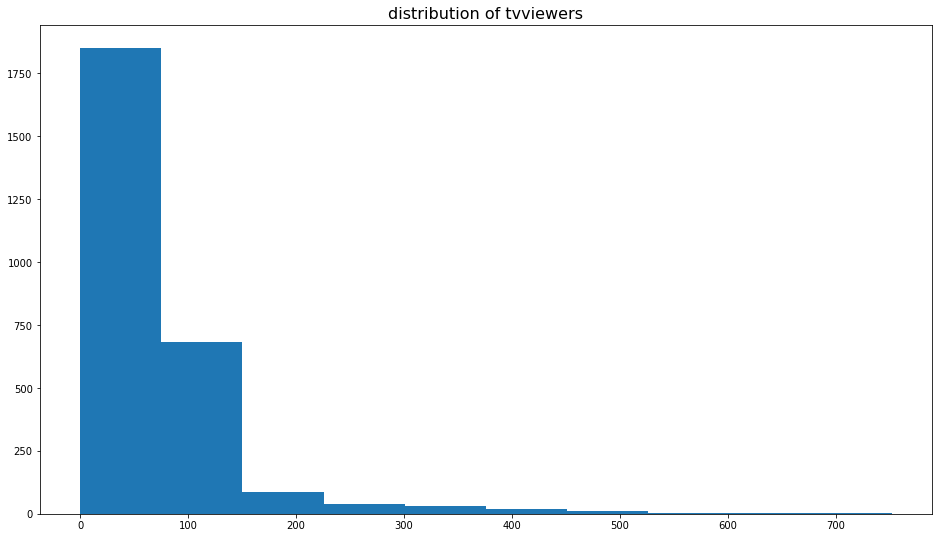

In [47]:
y=merged_data['tvviewers']

plt.figure(figsize = (16,9))

plt.hist(y)
plt.title('distribution of tvviewers',fontsize = 16)
plt.show()

In [48]:
# change y to a very small number if it's 0, because denominator cannot be 0
y[y==0]=0.0001

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


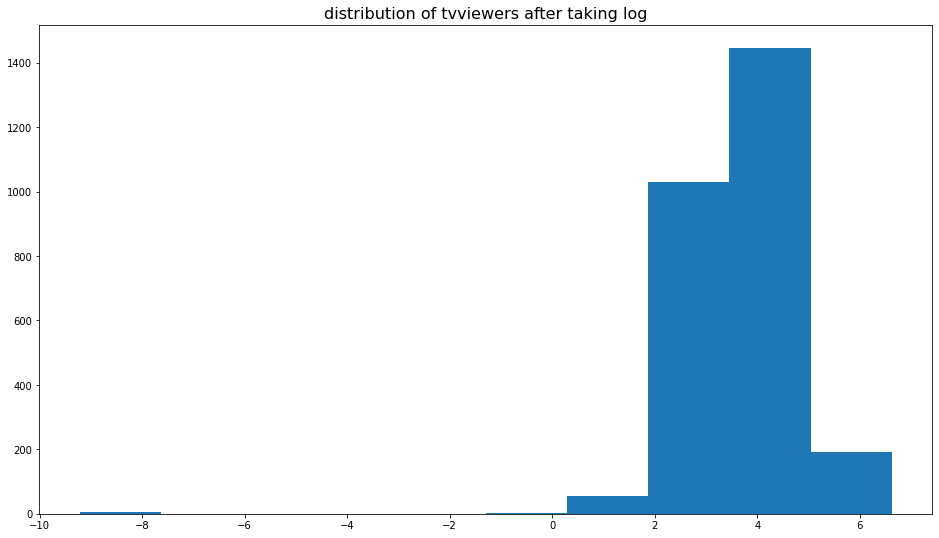

In [49]:
plt.figure(figsize = (16,9))
plt.hist(np.log(y))
plt.title('distribution of tvviewers after taking log',fontsize = 16)
plt.show()

In [76]:
X = merged_data['number_of_tweet']
y = merged_data['tvviewers']
y[y==0]=0.0001
y = np.log(y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [77]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              tvviewers   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     45.74
Date:                Thu, 26 May 2022   Prob (F-statistic):           1.65e-11
Time:                        14:51:11   Log-Likelihood:                -4285.8
No. Observations:                2731   AIC:                             8576.
Df Residuals:                    2729   BIC:                             8587.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.5913      0.030    1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


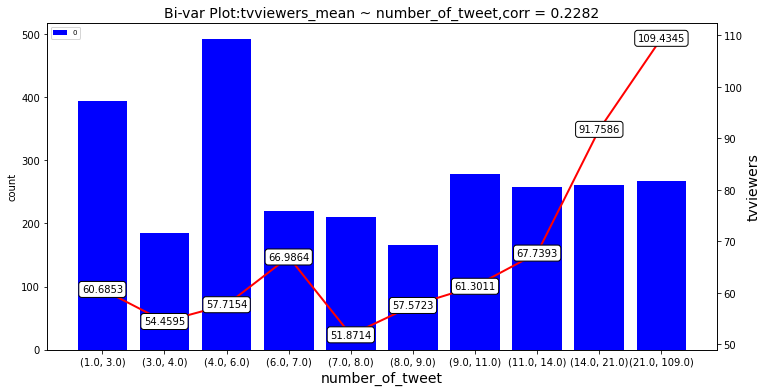

In [51]:
bin_corr(merged_data,'number_of_tweet','tvviewers',if_iv = 0,stats_type='_mean',figure_width = 12)
# bin_corr(merged_data,'number_of_player_dummy','tvviewers',if_iv = 0,stats_type='_mean',figure_width = 16)

## 2.impact of contents of live tweets on tv viewers


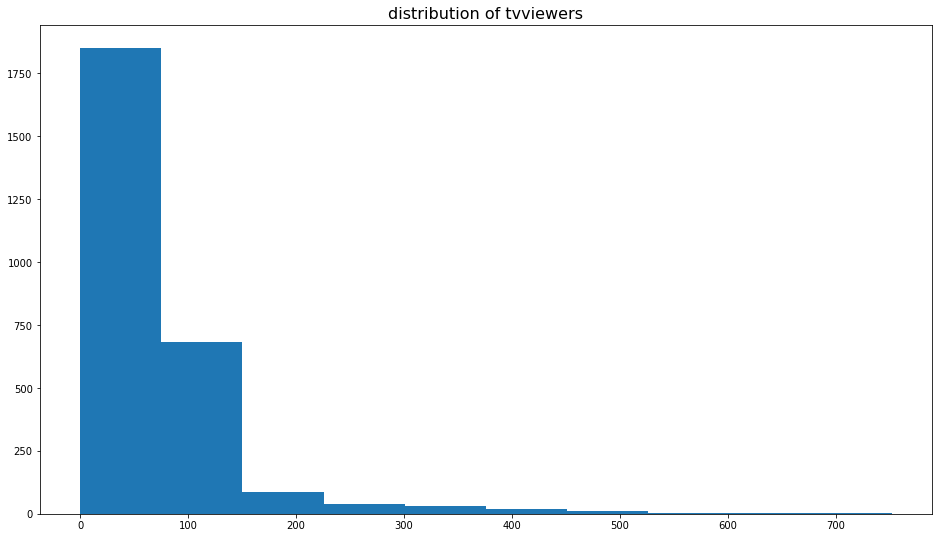

In [52]:
y=merged_data['tvviewers']

plt.figure(figsize = (16,9))

plt.hist(y)
plt.title('distribution of tvviewers',fontsize = 16)
plt.show()


In [53]:
# change y to a very small number if it's 0, because denominator cannot be 0
y[y==0]=0.0001

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


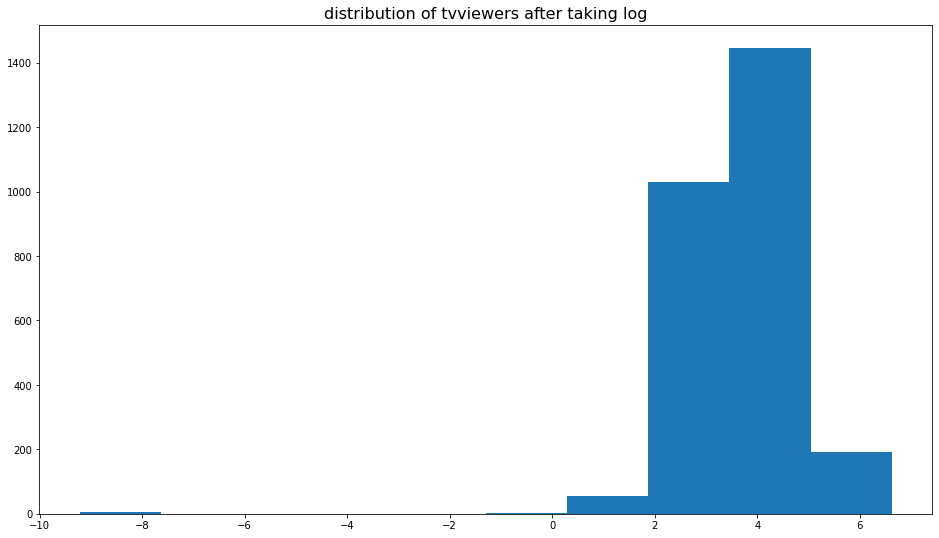

In [54]:
plt.figure(figsize = (16,9))
plt.hist(np.log(y))
plt.title('distribution of tvviewers after taking log',fontsize = 16)
plt.show()

### contents

In [74]:
X = merged_data[['number_of_team_dummy','number_of_player_dummy']]
y = merged_data['tvviewers']
y[y==0]=0.0001
y = np.log(y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [75]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              tvviewers   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     8.024
Date:                Thu, 26 May 2022   Prob (F-statistic):           0.000335
Time:                        14:50:46   Log-Likelihood:                -4300.5
No. Observations:                2731   AIC:                             8607.
Df Residuals:                    2728   BIC:                             8625.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


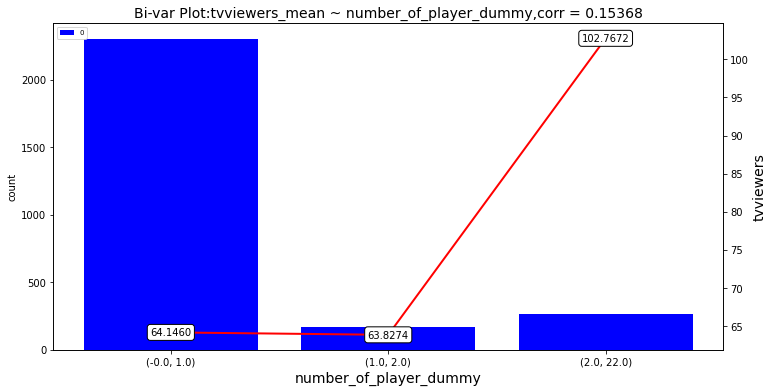

In [34]:
bin_corr(merged_data,'number_of_player_dummy','tvviewers',if_iv = 0,stats_type='_mean',figure_width = 12)
# bin_corr(merged_data,'number_of_player_dummy','tvviewers',if_iv = 0,stats_type='_mean',figure_width = 16)

### sentiment

In [78]:
X = merged_data[['topic9_senti','topic10_senti']]
y = merged_data['tvviewers']
y[y==0]=0.0001
y = np.log(y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              tvviewers   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.596
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0276
Time:                        14:51:26   Log-Likelihood:                -4304.9
No. Observations:                2731   AIC:                             8616.
Df Residuals:                    2728   BIC:                             8634.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.6894      0.026    143.954

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [59]:
bins = [-1,-0.05,0.05,1]
labels = ['negative','neutral','positive']
merged_data['topic9_senti_seg']= pd.cut(merged_data.topic9_senti,bins,right = False,labels = labels)
merged_data['topic10_senti_seg']= pd.cut(merged_data.topic10_senti,bins,right = False,labels = labels)
merged_data['topic9_senti_seg'] = merged_data.topic9_senti_seg.astype(str)
merged_data['topic10_senti_seg'] = merged_data.topic10_senti_seg.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


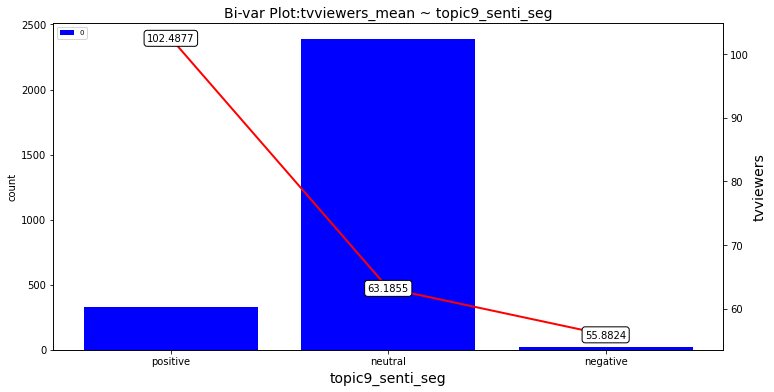

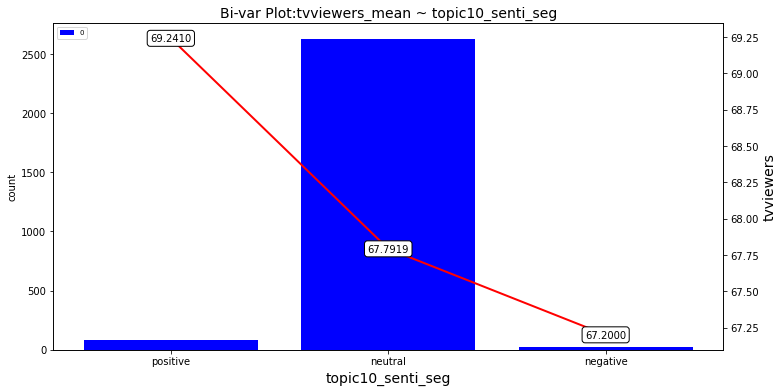

In [60]:
bin_corr(merged_data,'topic9_senti_seg','tvviewers',if_numerical = False,if_iv = 0,stats_type='_mean',figure_width = 12)
bin_corr(merged_data,'topic10_senti_seg','tvviewers',if_numerical = False,if_iv = 0,stats_type='_mean',figure_width = 12)

## 3.impact of contents of live tweets on user engagement

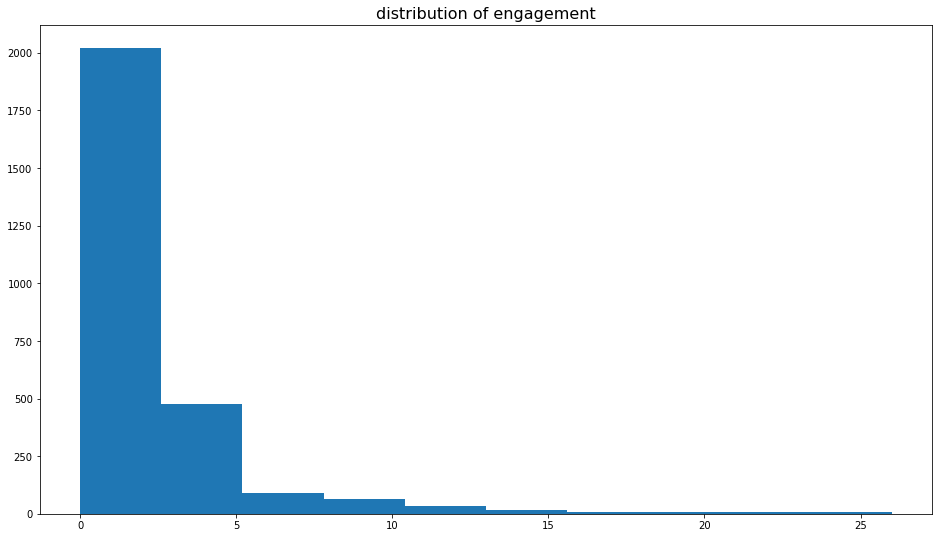

In [67]:
y=merged_data['number_of_engagement_dummy']

plt.figure(figsize = (16,9))

plt.hist(y)
plt.title('distribution of engagement',fontsize = 16)
plt.show()


In [68]:
#change y to a very small number if it's 0, because denominator cannot be 0
y[y==0]=0.0001

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


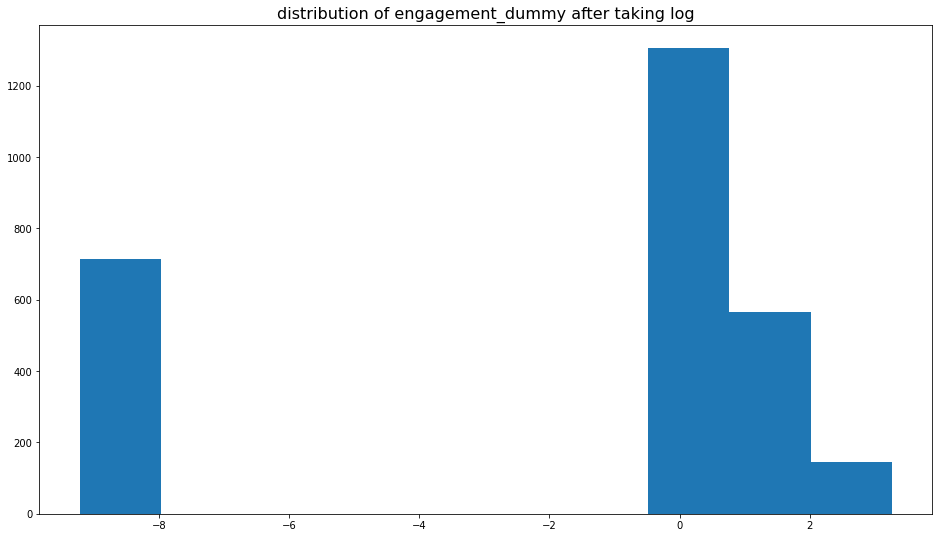

In [69]:
plt.figure(figsize = (16,9))
plt.hist(np.log(y))
plt.title('distribution of engagement_dummy after taking log',fontsize = 16)
plt.show()

### contents

In [70]:
X = merged_data[['number_of_team_dummy','number_of_player_dummy']]
y= merged_data['number_of_engagement_dummy']
y[y==0]=0.0001
y = np.log(y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                OLS Regression Results                                
Dep. Variable:     number_of_engagement_dummy   R-squared:                       0.063
Model:                                    OLS   Adj. R-squared:                  0.062
Method:                         Least Squares   F-statistic:                     91.99
Date:                        Thu, 26 May 2022   Prob (F-statistic):           2.18e-39
Time:                                14:50:07   Log-Likelihood:                -7837.5
No. Observations:                        2731   AIC:                         1.568e+04
Df Residuals:                            2728   BIC:                         1.570e+04
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


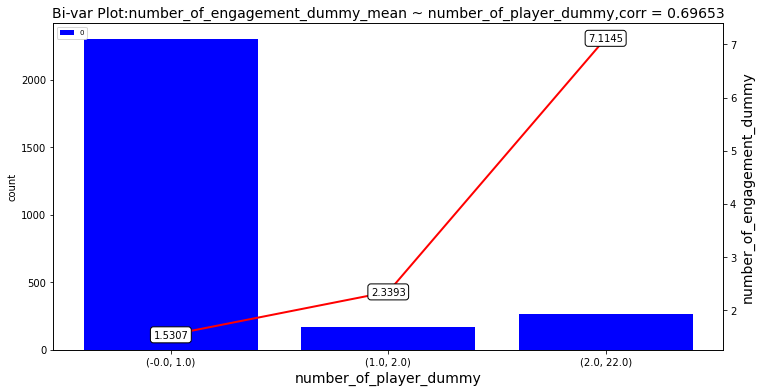

In [131]:
bin_corr(merged_data,'number_of_player_dummy','number_of_engagement_dummy',if_iv = 0,stats_type='_mean',figure_width = 12)
# bin_corr(merged_data,'number_of_team_dummy','engagement_dummy',if_iv = 0,stats_type='_mean',figure_width = 16)
# bin_corr(merged_data,'number_of_player_dummy','engagement',if_iv = 0,stats_type='_mean',figure_width = 16)

### sentiment

In [72]:
X = merged_data[['topic9_senti','topic10_senti']]
y= merged_data['number_of_engagement_dummy']
y[y==0]=0.0001
y = np.log(y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                OLS Regression Results                                
Dep. Variable:     number_of_engagement_dummy   R-squared:                       0.017
Model:                                    OLS   Adj. R-squared:                  0.017
Method:                         Least Squares   F-statistic:                     24.12
Date:                        Thu, 26 May 2022   Prob (F-statistic):           4.15e-11
Time:                                14:50:21   Log-Likelihood:                -7902.7
No. Observations:                        2731   AIC:                         1.581e+04
Df Residuals:                            2728   BIC:                         1.583e+04
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


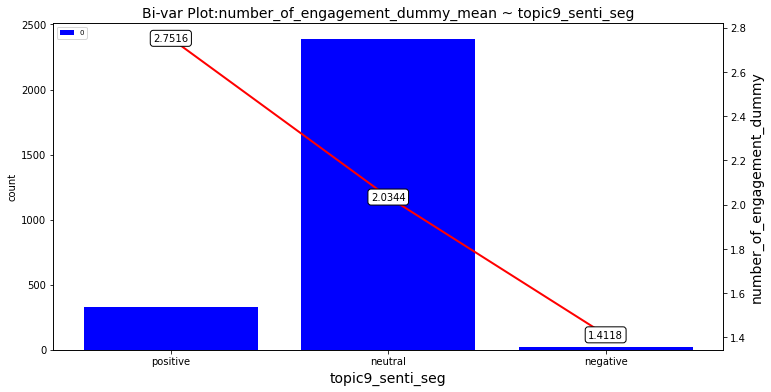

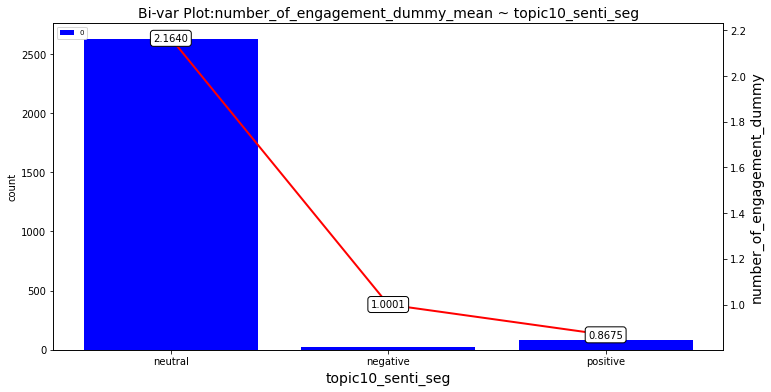

In [157]:
bin_corr(merged_data,'topic9_senti_seg','number_of_engagement_dummy',if_numerical = False,if_iv = 0,stats_type='_mean',figure_width = 12)
bin_corr(merged_data,'topic10_senti_seg','number_of_engagement_dummy',if_numerical = False,if_iv = 0,stats_type='_mean',figure_width = 12)